In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [4]:
%matplotlib widget

## Synchronous Condition

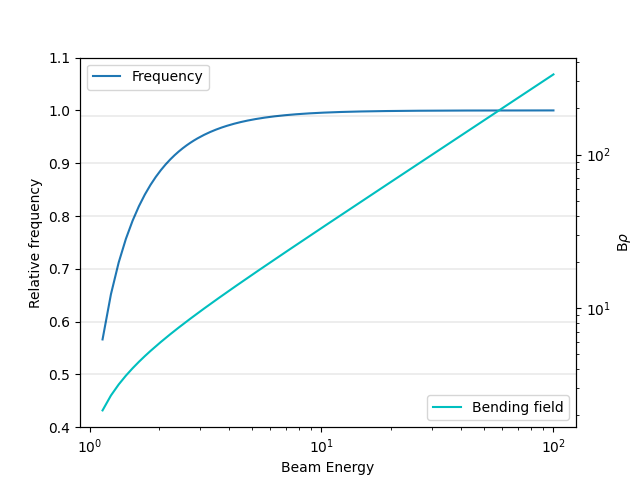

In [5]:
energy=np.linspace(0.938+0.2, 100, 1000) # GeV
gamma=energy/0.938
beta=np.sqrt(1-1/gamma/gamma)

fig,ax=plt.subplots()
ax.set_xlabel("Beam Energy")
ax.set_ylabel("Relative frequency")
ax.set_ylim(0.4,1.1)
ax.plot(energy, beta,label='Frequency')
#ax.set_yscale('log')
for hl in [0.5,0.6,0.7,0.8,0.9,0.99]:
    ax.axhline(y=hl, color='k',lw=0.1)
ax.set_xscale('log')
ax.legend(loc=2)
ax_m=ax.twinx()
ax_m.set_ylabel(r"B$\rho$")
ax_m.plot(energy,beta*gamma*0.938*10/3.0, color='c', label='Bending field')
ax_m.set_yscale('log')
ax_m.legend(loc=4)

## Single Turn Injection

In [4]:
from map2D import map2D
# Optics of the 2D map
beta=1
alpha=0
nturns=2000
tunex=0.25  # initial tune

#generating the macroparticles with beta=1, alpha=0 and shift it to septum
npar=10000
xlist=np.random.randn(npar)*5e-4+6.e-3  #Inject at 5e-3cm, which is designed
pxlist=np.random.randn(npar)*5e-4

sexstr=100
octstr=0

xpx=map2D(npart=1, twiss=[beta,alpha], tune=tunex, chrom=0.0, espr=0.0e-3,
                  particles=np.vstack([xlist,pxlist]))



import matplotlib.pyplot as plt
%matplotlib notebook
fig,ax=plt.subplots()
ax.set_xlabel(r'$x$ [mm]')
ax.set_ylabel(r"$x'$ [mrad]")
ax.set_xlim(-7, 7)
ax.set_ylim(-7, 7)

line,=ax.plot([],[],linestyle='', marker='.', markersize=0.5)
time_text = ax.text(0.05, 0.95,'',horizontalalignment='left',verticalalignment='top', transform=ax.transAxes)
def init():
    line.set_data(xpx.coor2D[0,:]*1e3,xpx.coor2D[1,:]*1e3)
    time_text.set_text('Turns: {:d}, tune:{:f}'.format(xpx.propagated_turns, xpx.phi/2/np.pi))
    return line,time_text

def run(i):
    # update the data
    s=sexstr
    oct=octstr
    if i==1:
        xpx.propagate()
    elif i<0:
        pass
        
    elif i==2:
        xpx.coor2D[1,:] += 0.005
        xpx.propagate()
        
    elif i>2:
        if i<382:
            xpx.set_map(twiss=[beta,alpha], tune=tunex+0.0001*i, chrom=0.0)
            xpx.coor2D[1,:] += s*xpx.coor2D[0,:]*xpx.coor2D[0,:]
            xpx.coor2D[1,:] += oct*xpx.coor2D[0,:]*xpx.coor2D[0,:]*xpx.coor2D[0,:]
            xpx.propagate()
            
        else:
            for j in range(1):
                xpx.coor2D[1,:] += s*xpx.coor2D[0,:]*xpx.coor2D[0,:]
                xpx.coor2D[1,:] += oct*xpx.coor2D[0,:]*xpx.coor2D[0,:]*xpx.coor2D[0,:]
                xpx.propagate()
                
    time_text.set_text('Turns: {:d}, tune:{:f}'.format(xpx.propagated_turns, xpx.phi/2/np.pi))
    line.set_data(xpx.coor2D[0,:]*1e3,xpx.coor2D[1,:]*1e3)
    return line,time_text

#for i in range(turns):
#    xpx.propagate()
#    ax.plot(xpx.coor2D[0,:]*1e3,xpx.coor2D[1,:]*1e3, linestyle='', marker='.', markersize=0.5)
#ax.plot(stats[2,0]*1e3,stats[2,1]*1e3, linestyle='', marker='+', markersize=12, color='g')
from matplotlib.animation import FuncAnimation
framelist=list(range(nturns))
delay=5
for i in range(delay//2):
    framelist.insert(3,-1)
for i in range(delay):
    framelist.insert(2,-1)
for i in range(delay*2):
    framelist.insert(1,-1)
anim = FuncAnimation(fig, run, frames=framelist, 
                     init_func=init, interval=1000/24, repeat=False, blit=True)


<IPython.core.display.Javascript object>

## Slow Resonance Extraction

<IPython.core.display.Javascript object>


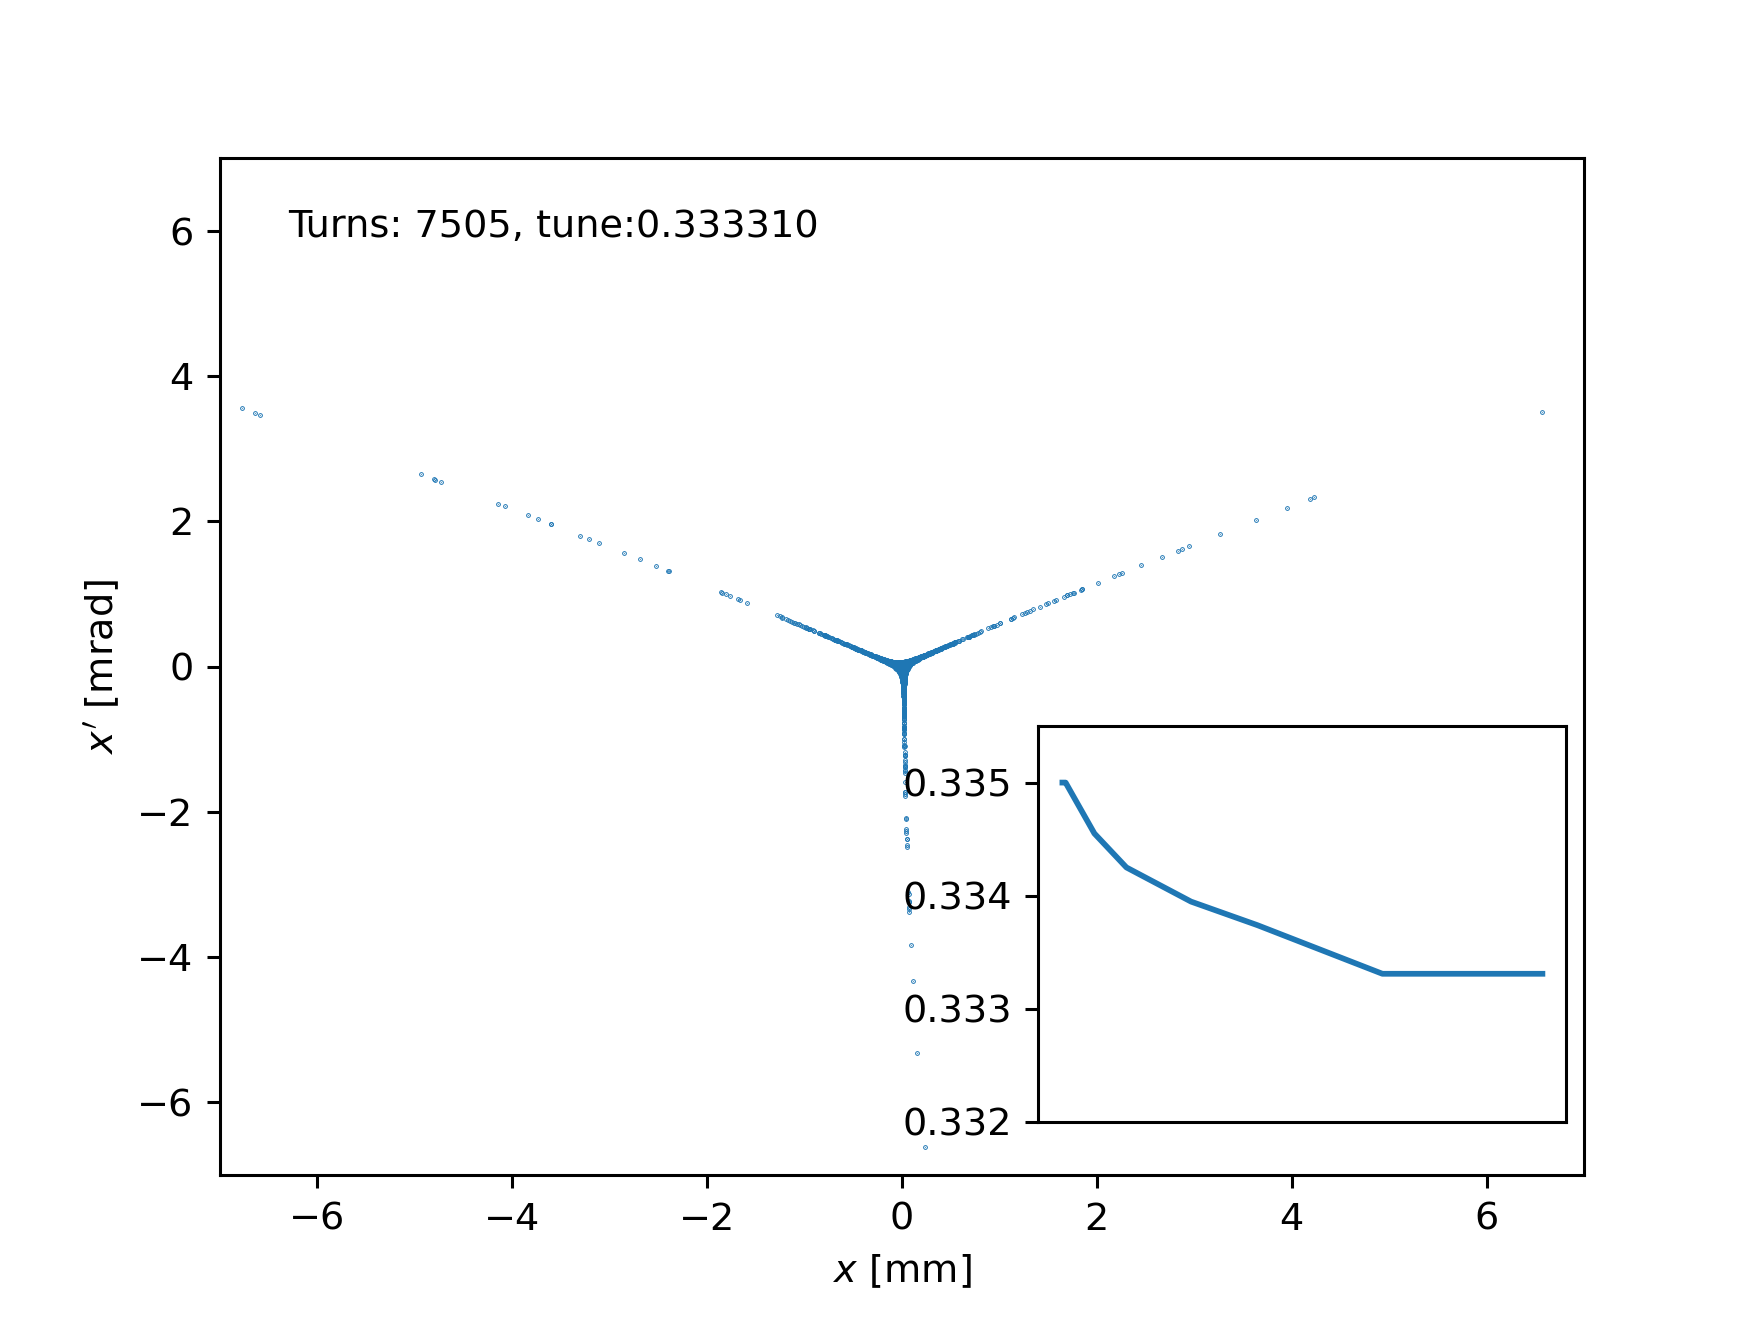

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from map2D import map2D

beta=1
alpha=0
tunex=0.335

num_run=0
npar=50000
xlist=np.random.randn(npar)*5e-4
pxlist=np.random.randn(npar)*5e-4

xpx=map2D(npart=1, twiss=[beta,alpha], tune=tunex, chrom=0.0, espr=5.0e-4,
                  particles=np.vstack([xlist,pxlist]))



import matplotlib.pyplot as plt
%matplotlib notebook
fig,ax=plt.subplots()
ax.set_xlabel(r'$x$ [mm]')
ax.set_ylabel(r"$x'$ [mrad]")
ax.set_xlim(-7, 7)
ax.set_ylim(-7, 7)


line,=ax.plot([],[],linestyle='', marker='.', markersize=0.5)
time_text = ax.text(0.05, 0.95,'',horizontalalignment='left',verticalalignment='top', transform=ax.transAxes)

turn_hist=[]
tune_hist=[]

def init():
    line.set_data(xpx.coor2D[0,:]*1e3,xpx.coor2D[1,:]*1e3)
    time_text.set_text('Turns: {:d}, tune:{:f}'.format(xpx.propagated_turns, xpx.phi/2/np.pi))
    return line,time_text

def run(i):
    # update the data
    s=15
    if i<10:
        pass
    elif i<100:
        xpx.set_map(twiss=[beta,alpha], tune=xpx.phi/2/np.pi-0.000005, chrom=0.0)
    elif i<200:
        xpx.set_map(twiss=[beta,alpha], tune=xpx.phi/2/np.pi-0.000003, chrom=0.0)    
    elif i<400:
        xpx.set_map(twiss=[beta,alpha], tune=xpx.phi/2/np.pi-0.0000015, chrom=0.0)
    elif i<600:
        xpx.set_map(twiss=[beta,alpha], tune=xpx.phi/2/np.pi-0.000001, chrom=0.0)
    elif i<800:
        xpx.set_map(twiss=[beta,alpha], tune=xpx.phi/2/np.pi-0.0000011, chrom=0.0)
    elif i<1000:
        xpx.set_map(twiss=[beta,alpha], tune=xpx.phi/2/np.pi-0.0000011, chrom=0.0)
        
        
    for j in range(5):        
        xpx.coor2D[1,:] += s*xpx.coor2D[0,:]*xpx.coor2D[0,:]
        xpx.propagate()
        xpx.septum(0.01)
    
    line.set_data(xpx.coor2D[0,:]*1e3,xpx.coor2D[1,:]*1e3)
    time_text.set_text('Turns: {:d}, tune:{:f}'.format(xpx.propagated_turns, xpx.phi/2/np.pi))
    turn_hist.append(xpx.propagated_turns)
    tune_hist.append(xpx.phi/2/np.pi)
    #line_tune.set_data(np.array(turn_hist), np.array(tune_hist))
    #return tuple(line,line_tune,time_text)
    return line,time_text

#for i in range(turns):
#    xpx.propagate()
#    ax.plot(xpx.coor2D[0,:]*1e3,xpx.coor2D[1,:]*1e3, linestyle='', marker='.', markersize=0.5)
#ax.plot(stats[2,0]*1e3,stats[2,1]*1e3, linestyle='', marker='+', markersize=12, color='g')
from matplotlib.animation import FuncAnimation

anim = FuncAnimation(fig, run, frames=np.arange(1500), 
                      interval=10, blit=True, repeat=False)


In [5]:
ax_in = fig.add_axes([0.59,0.15,0.3,0.3])
ax_in.set_xticks([])

ax_in.set_ylim(0.332,0.3355)
ax_in.plot(turn_hist,tune_hist)

<IPython.core.display.Javascript object>


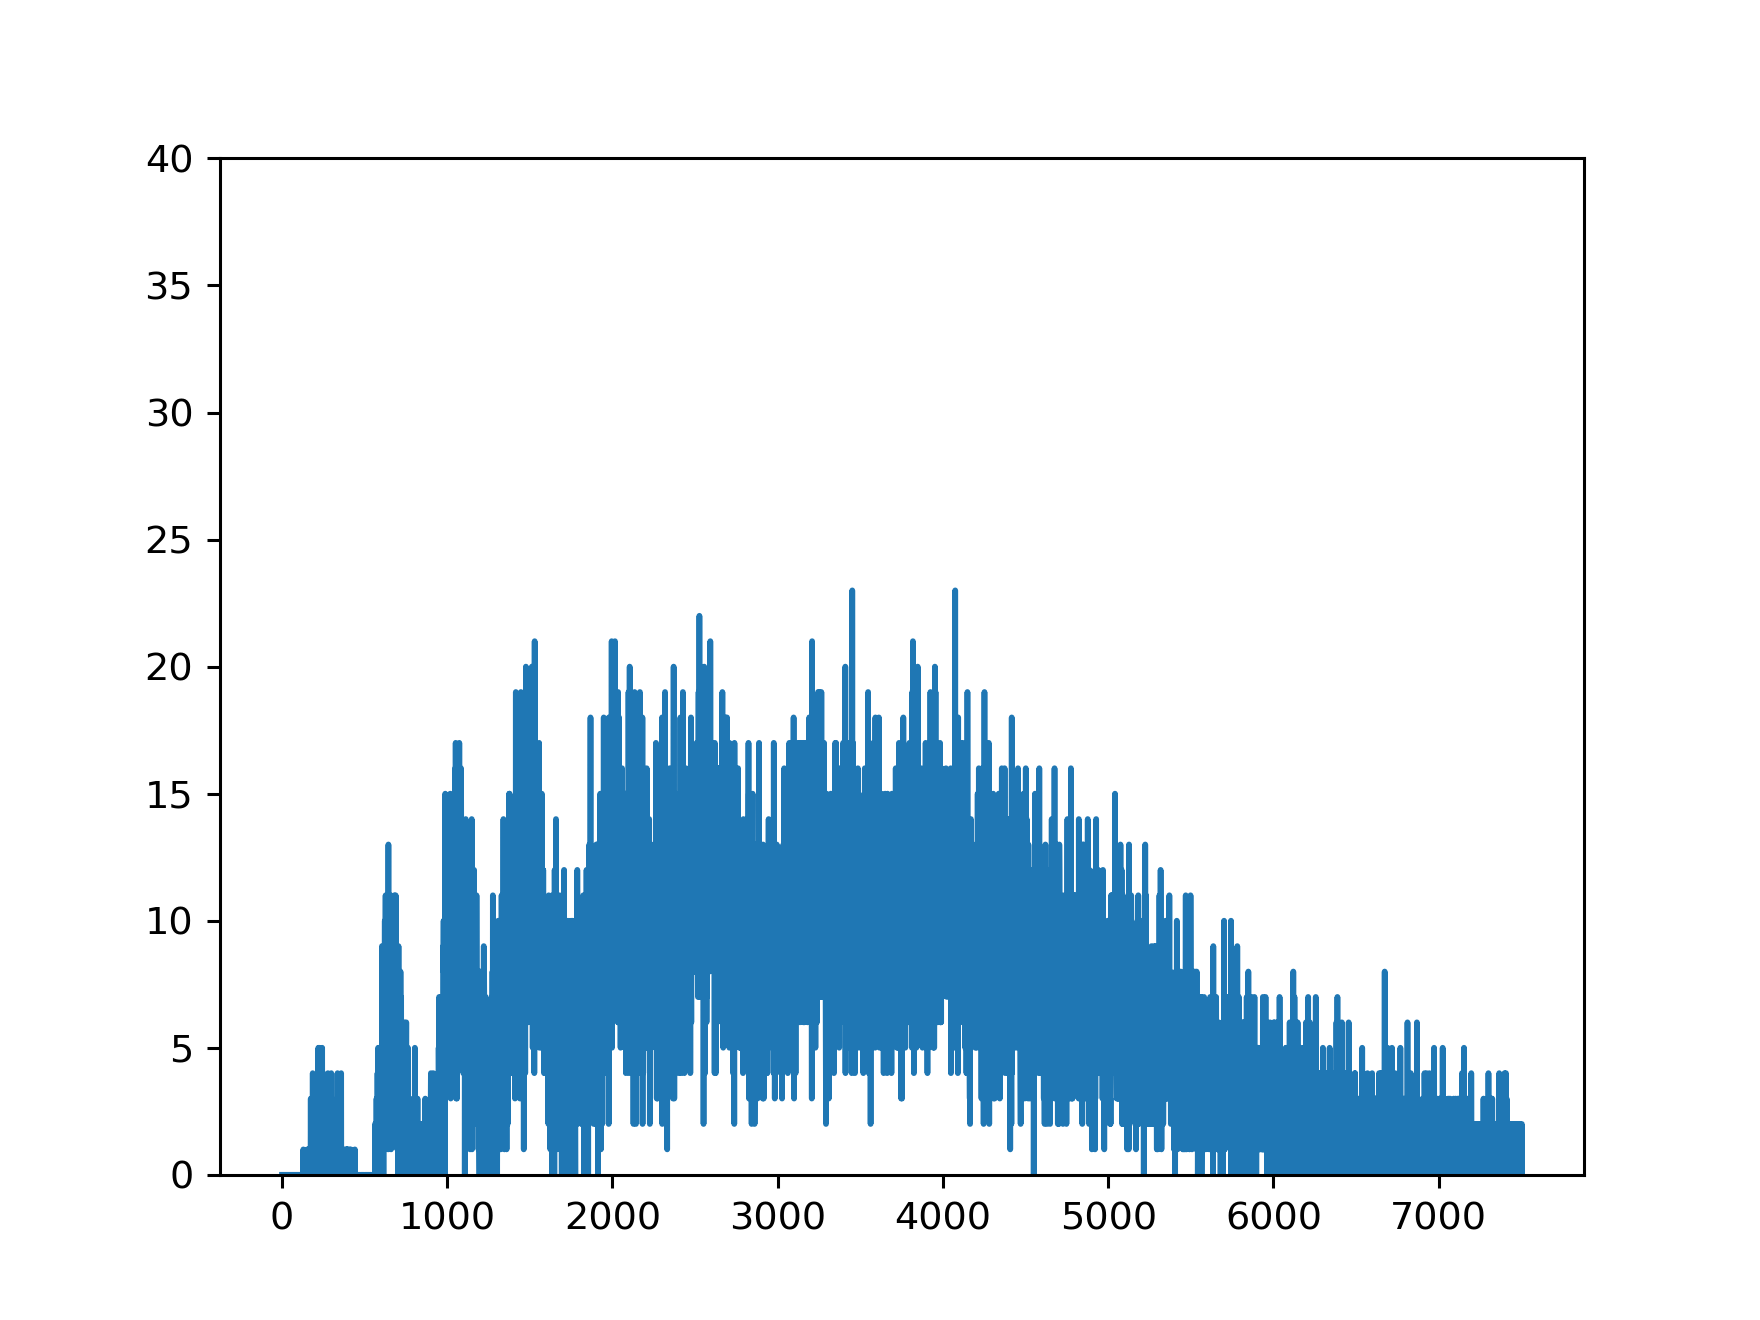

In [6]:
fig,axl=plt.subplots()
axl.set_ylim(0,40)
axl.plot(xpx.extract_history)

## Lossless Resonance Extraction

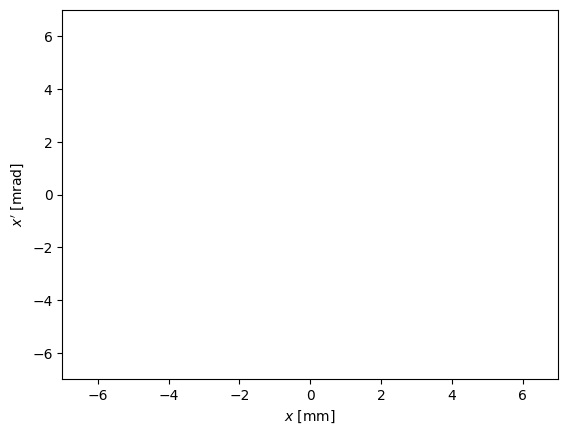

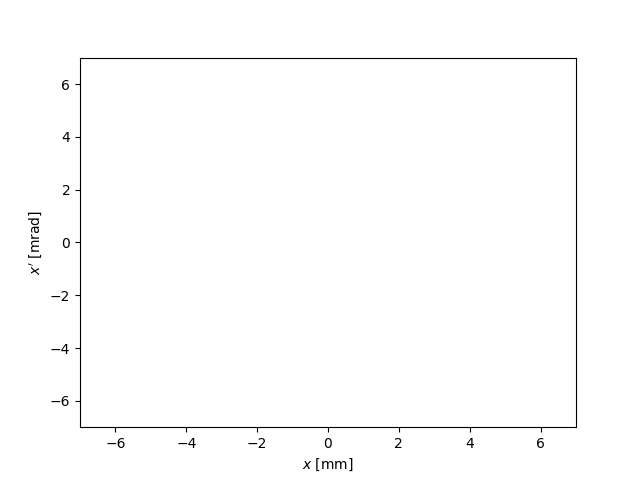

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from map2D import map2D

%matplotlib widget
beta=1
alpha=0
tunex=0.249


num_run=0
npar=10000
xlist=np.random.randn(npar)*5e-4
pxlist=np.random.randn(npar)*5e-4


xpx=map2D(npart=1, twiss=[beta,alpha], tune=tunex, chrom=0.0, espr=5.0e-4,
                  particles=np.vstack([xlist,pxlist]))


fig,ax=plt.subplots()
ax.set_xlabel(r'$x$ [mm]')
ax.set_ylabel(r"$x'$ [mrad]")
ax.set_xlim(-7, 7)
ax.set_ylim(-7, 7)

line,=ax.plot([],[],linestyle='', marker='.', markersize=0.5)
time_text = ax.text(0.05, 0.95,'',horizontalalignment='left',verticalalignment='top', transform=ax.transAxes)
def init():
    line.set_data(xpx.coor2D[0,:]*1e3,xpx.coor2D[1,:]*1e3)
    time_text.set_text('Turns: {:d}, tune:{:f}'.format(xpx.propagated_turns, xpx.phi/2/np.pi))
    return line, time_text

def run(i):
    # update the data
    s=150    #-180
    oct=1000     #3000.0
    if i<1000:
        
        for j in range(11):
            xpx.set_map(twiss=[beta,alpha], tune=tunex+0.00001*i, chrom=0.0)
            xpx.coor2D[1,:] += s*xpx.coor2D[0,:]*xpx.coor2D[0,:]
            xpx.coor2D[1,:] += oct*xpx.coor2D[0,:]*xpx.coor2D[0,:]*xpx.coor2D[0,:]
            xpx.propagate()
        
    
    else:
        
        
        xpx.coor2D[1,:] += s*xpx.coor2D[0,:]*xpx.coor2D[0,:]
        xpx.coor2D[1,:] += oct*xpx.coor2D[0,:]*xpx.coor2D[0,:]*xpx.coor2D[0,:]
        xpx.propagate()
        
    
    line.set_data(xpx.coor2D[0,:]*1e3,xpx.coor2D[1,:]*1e3)
    time_text.set_text('Turns: {:d}, tune:{:f}'.format(xpx.propagated_turns, xpx.phi/2/np.pi))
    
    return line, time_text

#for i in range(turns):
#    xpx.propagate()
#    ax.plot(xpx.coor2D[0,:]*1e3,xpx.coor2D[1,:]*1e3, linestyle='', marker='.', markersize=0.5)
#ax.plot(stats[2,0]*1e3,stats[2,1]*1e3, linestyle='', marker='+', markersize=12, color='g')
from matplotlib.animation import FuncAnimation
anim = FuncAnimation(fig, run, frames=np.arange(1000), init_func=init,
                      interval=100, blit=False, repeat=False)
display(fig)

In [2]:
from PyLatte.resonance import draw_resonance_lines
%matplotlib notebook

<IPython.core.display.Javascript object>


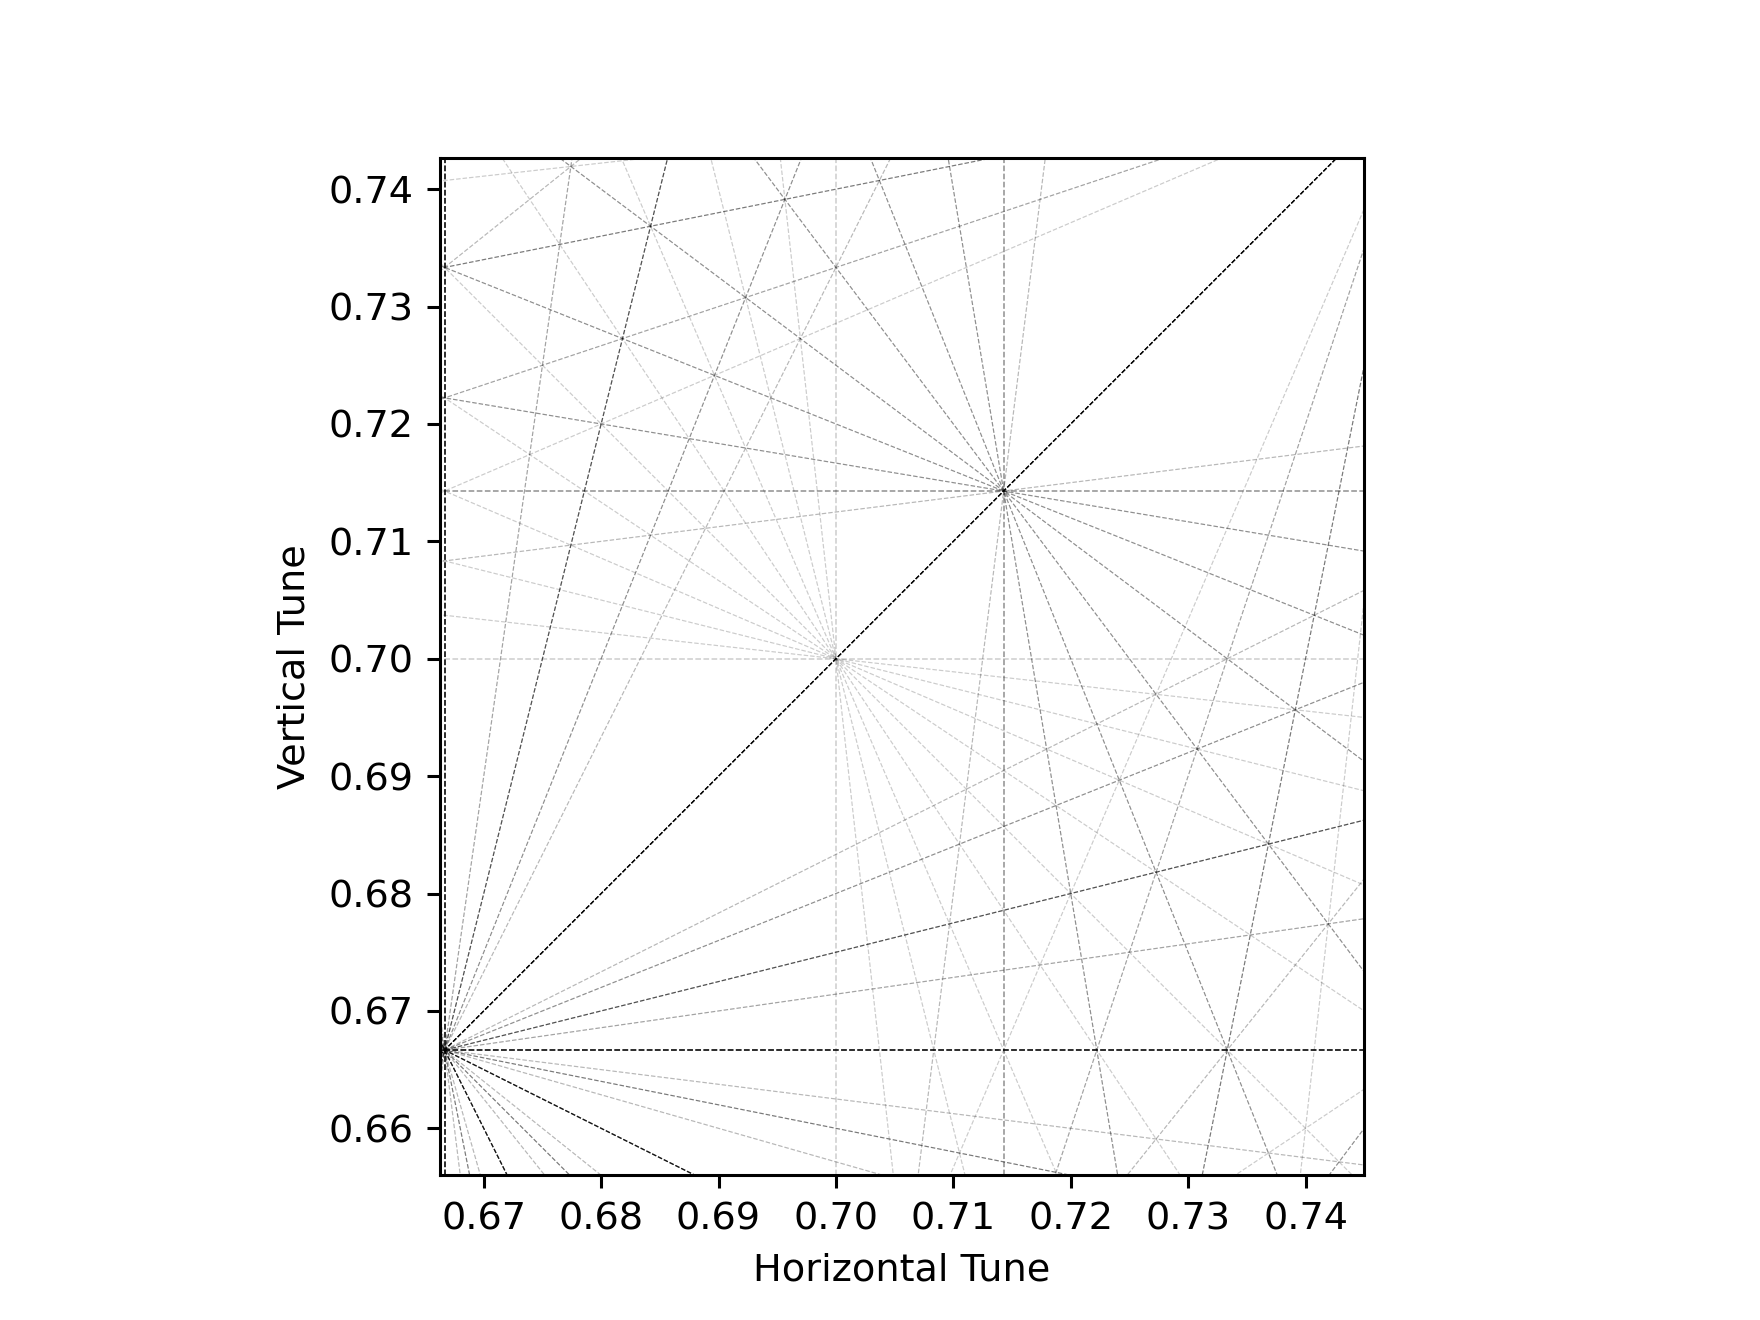

In [3]:
fig, ax=plt.subplots()
draw_resonance_lines(ax, max_order=10, minimum_alpha=0.2, )

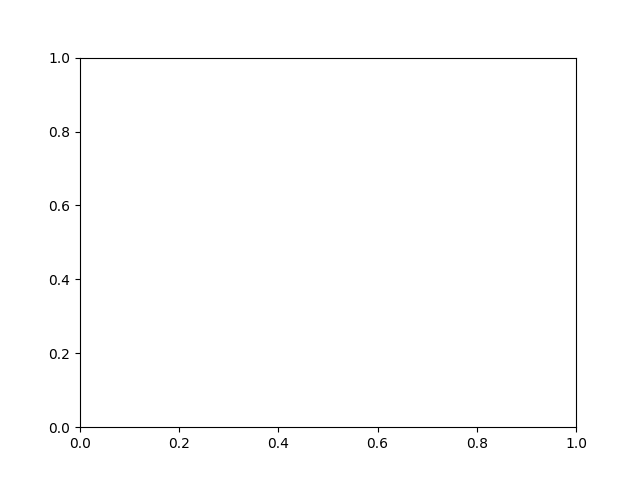